In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
df_weather = pd.read_csv('weatherAUS.csv')

In [37]:
df_weather.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [38]:
df_weather.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [39]:
df_weather.shape
# to check the rows and columns of the dataset

(145460, 23)

In [40]:
df_weather.info()
# types of variables in the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#####  Descriptive Statistics 

In [41]:
#Five point summary for Numerical variables
df_weather.describe().transpose()

count         mean        std    min     25%     50%  \
MinTemp        143975.0    12.194034   6.398495   -8.5     7.6    12.0   
MaxTemp        144199.0    23.221348   7.119049   -4.8    17.9    22.6   
Rainfall       142199.0     2.360918   8.478060    0.0     0.0     0.0   
Evaporation     82670.0     5.468232   4.193704    0.0     2.6     4.8   
Sunshine        75625.0     7.611178   3.785483    0.0     4.8     8.4   
WindGustSpeed  135197.0    40.035230  13.607062    6.0    31.0    39.0   
WindSpeed9am   143693.0    14.043426   8.915375    0.0     7.0    13.0   
WindSpeed3pm   142398.0    18.662657   8.809800    0.0    13.0    19.0   
Humidity9am    142806.0    68.880831  19.029164    0.0    57.0    70.0   
Humidity3pm    140953.0    51.539116  20.795902    0.0    37.0    52.0   
Pressure9am    130395.0  1017.649940   7.106530  980.5  1012.9  1017.6   
Pressure3pm    130432.0  1015.255889   7.037414  977.1  1010.4  1015.2   
Cloud9am        89572.0     4.447461   2.887159    0.0     1.0     5.0   
Cloud3pm        86102.0     4.509930   2.720357    0.0     2.0     5.0   
Temp9am        143693.0    16.990631   6.488753   -7.2    12.3    16.7   
Temp3pm        141851.0    21.683390   6.936650   -5.4    16.6    21.1   

                  75%     max  
MinTemp          16.9    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7

In [42]:
df_weather.groupby(['RainTomorrow']).count()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
RainTomorrow                                                              
No            110316    110316   109854   110049    109586        63491   
Yes            31877     31877    31702    31822     31201        17859   

              Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
RainTomorrow                                                    ...   
No               57556       103453         103488      102224  ...   
Yes              16821        29410          29435       29956  ...   

              WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
RainTomorrow                                                        
No                  108369       109076       107670        99405   
Yes                  31194        31343        30913        28774   

              Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  
RainTomorrow                                                                
No                  99448     67914     64811   109710   108332     109586  
Yes                 28764     20622     20288    31579    31135      31201  

[2 rows x 22 columns]

In [43]:
#Categorical Variables
df_weather.describe(include=['O'])

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2014-04-19  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

#### Handeling Date variable

In [44]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [45]:
df_weather['year'] = pd.DatetimeIndex(df_weather['Date']).year

In [46]:
df_weather['month'] = pd.DatetimeIndex(df_weather['Date']).month

In [47]:
df_weather.drop('Date',axis=1,inplace=True)

In [48]:
df_weather.head()
# after extracting year and month from the date variable and date variable also droped. 

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure9am  Pressure3pm  \
0           44.0          W        WNW  ...       1007.7       1007.1   
1           44.0        NNW        WSW  ...       1010.6       1007.8   
2           46.0          W        WSW  ...       1007.6       1008.7   
3           24.0         SE          E  ...       1017.6       1012.8   
4           41.0        ENE         NW  ...       1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  
0       8.0       NaN     16.9     21.8         No            No  2008     12  
1       NaN       NaN     17.2     24.3         No            No  2008     12  
2       NaN       2.0     21.0     23.2         No            No  2008     12  
3       NaN       NaN     18.1     26.5         No            No  2008     12  
4       7.0       8.0     17.8     29.7         No            No  2008     12  

[5 rows x 24 columns]

####  Handeling Duplicate values

In [49]:
duplicate  = df_weather.duplicated()
print(duplicate.sum())

161


In [50]:
df_weather.drop_duplicates(inplace=True)

In [51]:
check_duplicate_removal = df_weather.duplicated()
print(check_duplicate_removal.sum())

0


# Univariate Analysis

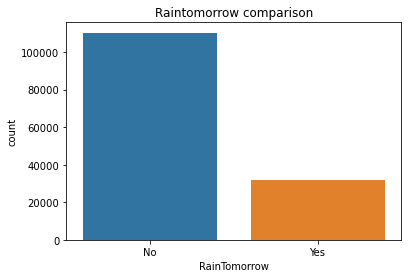

In [52]:
plt.title('Raintomorrow comparison')
sns.countplot(data=df_weather,x='RainTomorrow')
plt.show()
# The No counts have 110316 entries, and

# The Yes counts have 31877 entries.

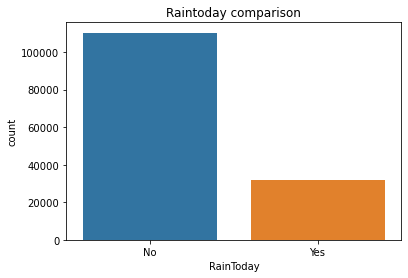

In [53]:
plt.title('Raintoday comparison')
sns.countplot(data=df_weather,x='RainToday')
plt.show()
# The No variable have 110319 entries, and

# The Yes variable have 31880 entries.

# Bivariate Analysis

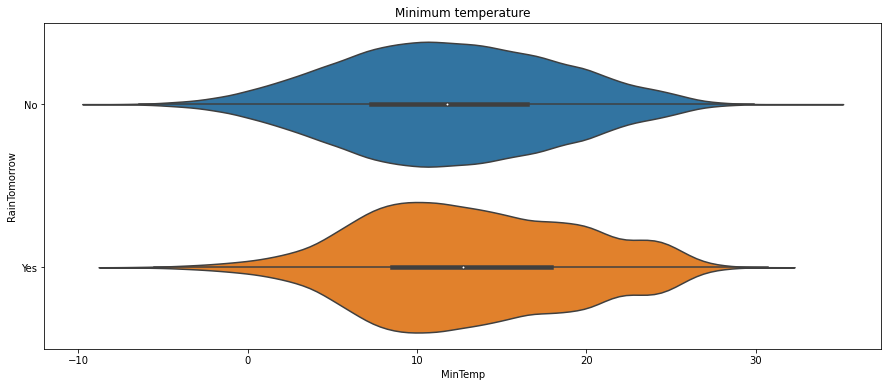

In [54]:
## visualize the features
plt.figure(figsize=(15,6))
plt.title('Minimum temperature')
sns.violinplot(data=df_weather,x='MinTemp',y='RainTomorrow')
plt.show()
# minimum temperature seems normally distributed and outliers present on the variable and lies between 8 to 18
# mean and 50th percentile are equal therefore minimum temperate variable  is normally distributed
# in a minimum temperate variable the maximum point is 33.8

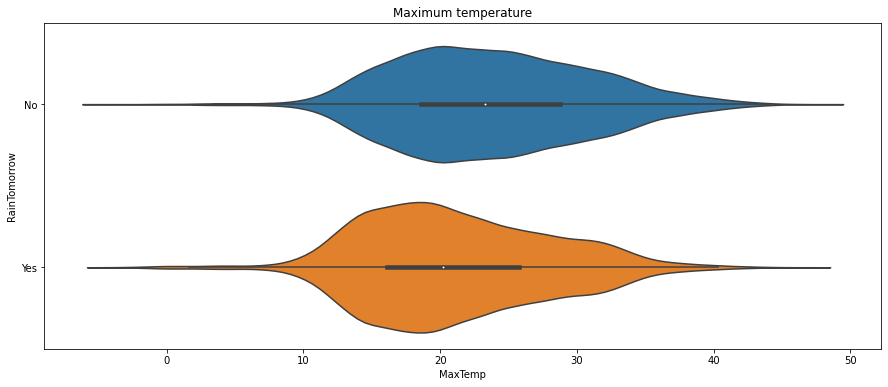

In [55]:
plt.figure(figsize=(15,6))
plt.title('Maximum temperature')
sns.violinplot(data=df_weather,x='MaxTemp',y='RainTomorrow')
plt.show()
# maximum temperature seems normally distributed and outliers present on the variable and  50% of data lie between 18 to 28
# mean and 50% th percentile are equal so maximum temperature is also normally distributed
# in a maximum temperate variable the maximum point is 48 in a whole data set described in decriptive statistics

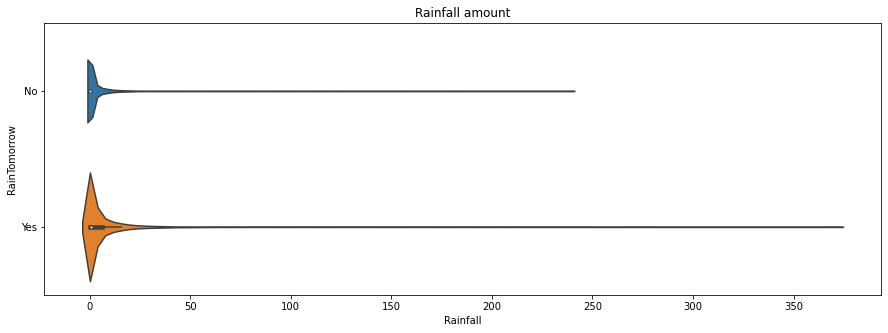

In [56]:
plt.figure(figsize=(15,5))
plt.title('Rainfall amount')
sns.violinplot(data=df_weather,x='Rainfall',y='RainTomorrow')
plt.show()
# Rainfall is rightly skewed distributed on both no and yes

# categorical to categorical

Text(0, 0.5, 'RainTomorrow')

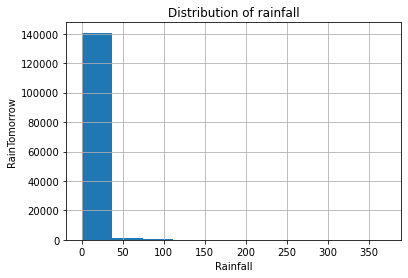

In [57]:
plt.title('Distribution of rainfall')
fig = df_weather.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')
# rainfall possitively distributed on raintomorrow feature

Text(0, 0.5, 'RainTomorrow')

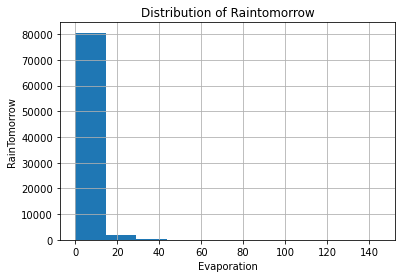

In [58]:
plt.title('Distribution of Raintomorrow')
fig = df_weather.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

Text(0, 0.5, 'RainTomorrow')

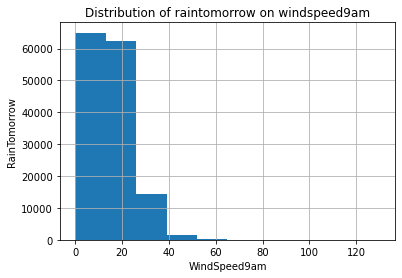

In [59]:
plt.title('Distribution of raintomorrow on windspeed9am')
fig = df_weather.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

Text(0, 0.5, 'RainTomorrow')

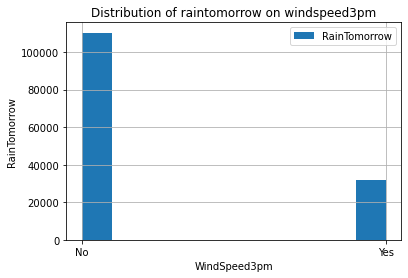

In [60]:
plt.title('Distribution of raintomorrow on windspeed3pm')
fig = df_weather.RainTomorrow.hist(bins=10,legend=True)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

# numerical to numerical 

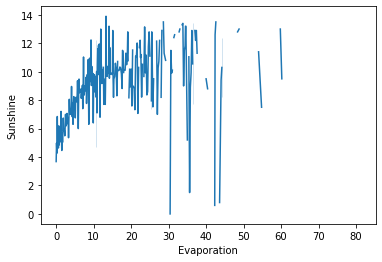

In [61]:
sns.lineplot(data=df_weather,x='Evaporation',y='Sunshine')
plt.show()
# There is Strong relationship between evaporation and sunshine

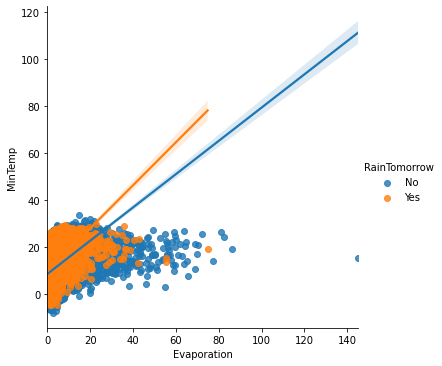

In [62]:
sns.lmplot(data=df_weather,x='Evaporation',y='MinTemp',hue='RainTomorrow')
plt.show()
# there is a relationship between evaporation and minimum temperature

In [63]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145299 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145299 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142172 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

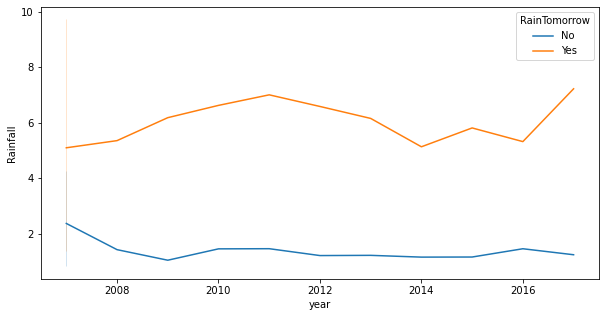

In [64]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_weather,x='year',y='Rainfall',hue='RainTomorrow')
plt.show()
# maximum rainfall lie on the year of 2007 and 2011 
# average amount of rainfall lie on 2008 and 2016 
# lowest amount of rainfall lie on 2014

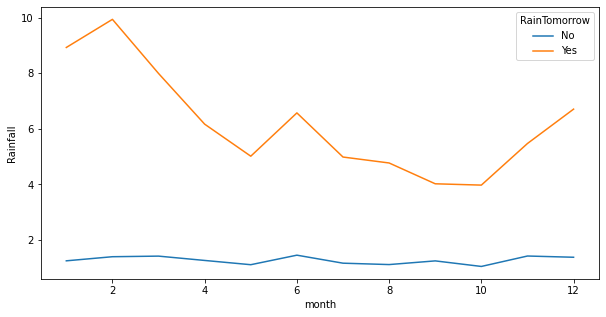

In [65]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_weather,x='month',y='Rainfall',hue='RainTomorrow')
plt.show()
# maximum rainfall lie on the month of febraury and june 
# average amount of rainfall lie on the month of april and novembar 
# lowest amount of rainfall lie on the month of octobar 

<Figure size 360x360 with 0 Axes>

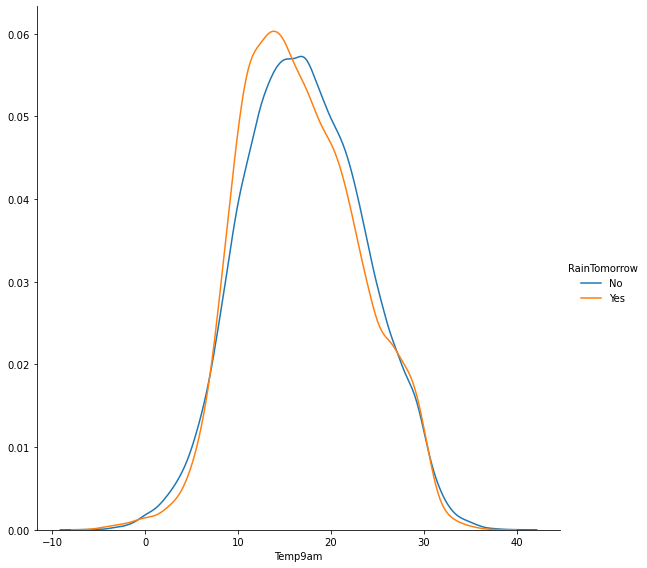

In [66]:
plt.figure(figsize=(5,5))
sns.FacetGrid(data=df_weather, hue="RainTomorrow", size=8).map(sns.kdeplot, "Temp9am").add_legend()
plt.ioff() 
plt.show()

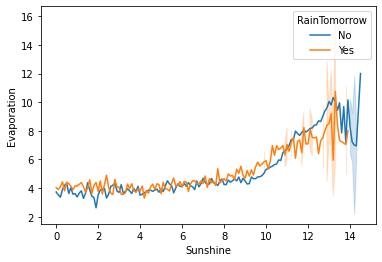

In [67]:
sns.lineplot(data=df_weather,x='Sunshine',y='Evaporation',hue='RainTomorrow')
plt.show()

<Figure size 216x216 with 0 Axes>

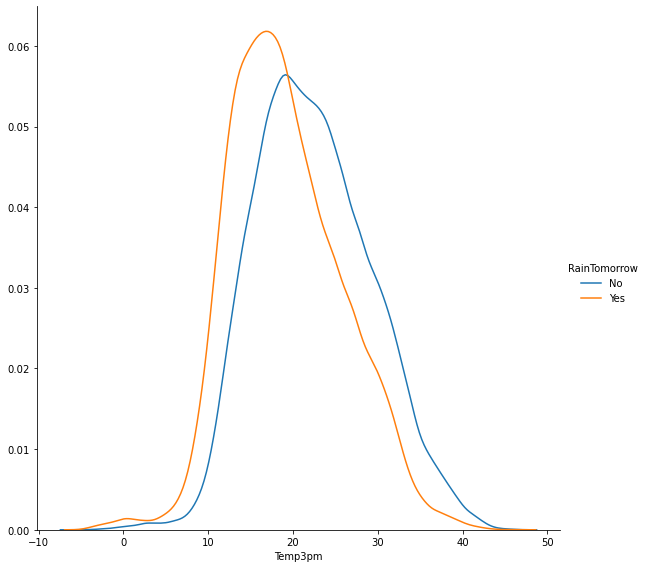

In [68]:
plt.figure(figsize=(3,3))
sns.FacetGrid(data=df_weather, hue="RainTomorrow", size=8).map(sns.kdeplot, "Temp3pm").add_legend()
plt.ioff() 
plt.show()

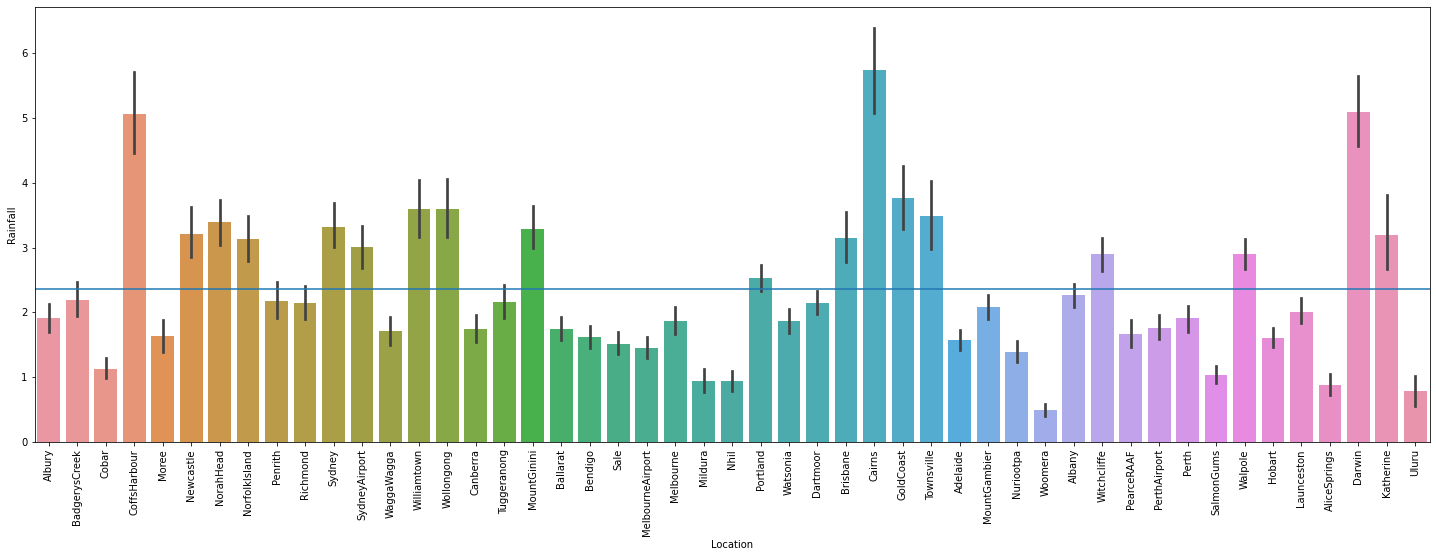

In [69]:
plt.figure(figsize=(25,8))
sns.barplot(data=df_weather,x='Location',y='Rainfall')
plt.xticks(rotation='vertical')
plt.axhline(df_weather['Rainfall'].mean())
plt.show()
# highest rainfall for the top three cities are caims followed by darwin and caffsharbour
# average rainfall for the city is albany
# lowest rainfall for the top three cities are woomera followed by ulluru and Alicesprings

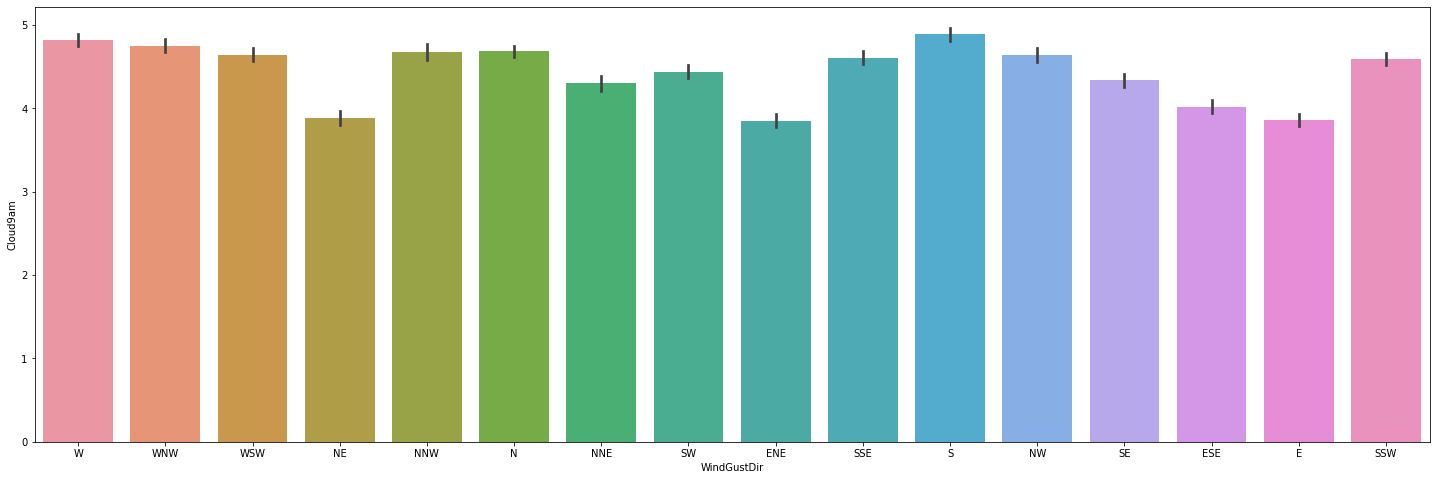

In [70]:
plt.figure(figsize=(25,8))
sns.barplot(data=df_weather,x='WindGustDir',y='Cloud9am')
plt.xticks(rotation='horizontal')
plt.show()
# morning time have a less direction speed

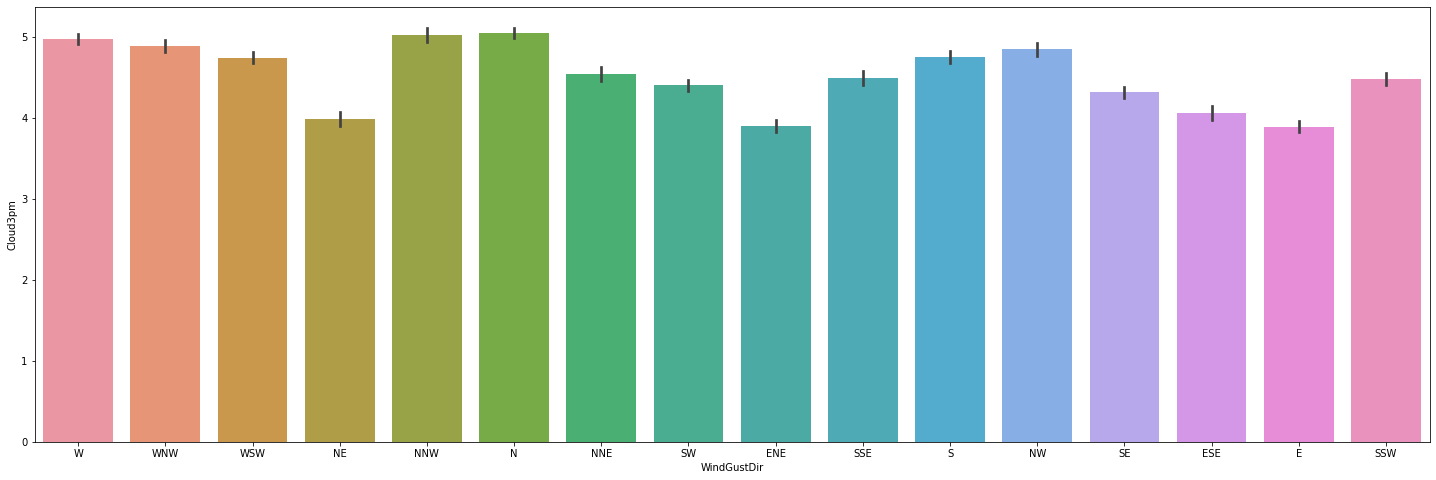

In [71]:
plt.figure(figsize=(25,8))
sns.barplot(data=df_weather,x='WindGustDir',y='Cloud3pm')
plt.xticks(rotation='horizontal')
plt.show()
# evening time have a more direction speed compared to morning

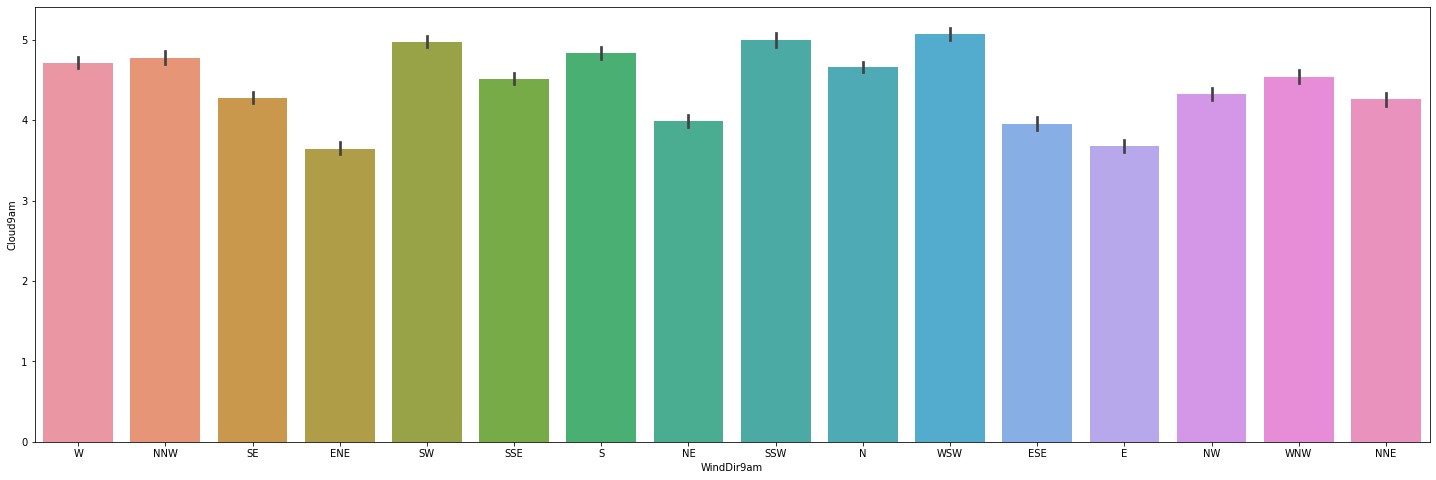

In [72]:
plt.figure(figsize=(25,8))
sns.barplot(data=df_weather,x='WindDir9am',y='Cloud9am')
plt.xticks(rotation='horizontal')
plt.show()
# on the morning time of  windspeed increases cloud also increases

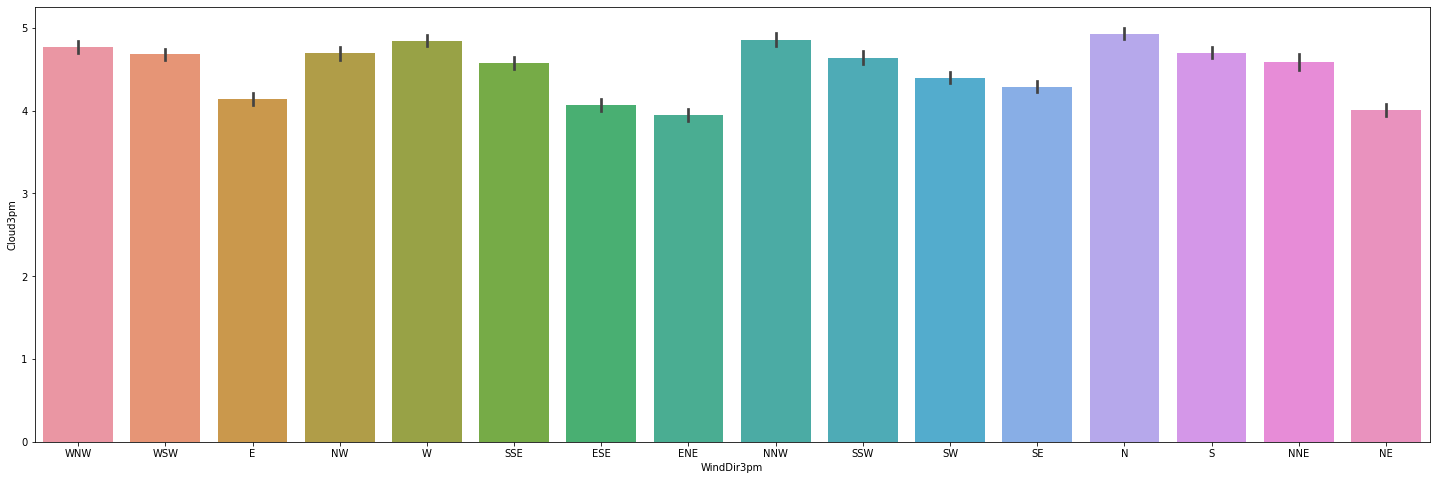

In [73]:
plt.figure(figsize=(25,8))
sns.barplot(data=df_weather,x='WindDir3pm',y='Cloud3pm')
plt.xticks(rotation='horizontal')
plt.show()
# on the morning time of  windspeed increases cloud also increases

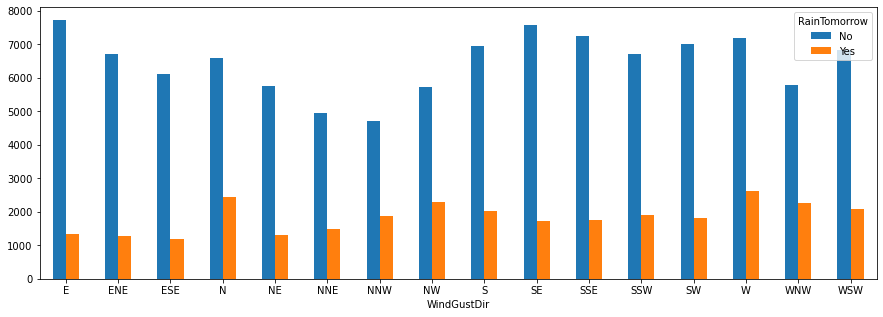

In [74]:
pd.crosstab(df_weather['WindGustDir'],df_weather['RainTomorrow']).plot(kind='bar',figsize=(15,5),stacked=False)
plt.xticks(rotation='horizontal')
plt.show()
# most of the direction has a non raintomorrow

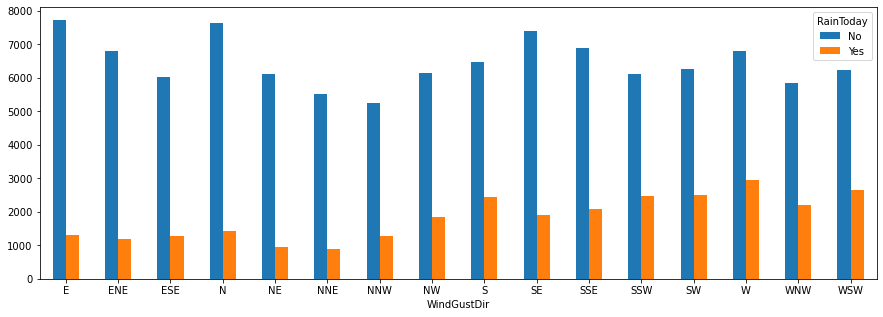

In [75]:
pd.crosstab(df_weather['WindGustDir'],df_weather['RainToday']).plot(kind='bar',figsize=(15,5),stacked=False)
plt.xticks(rotation='horizontal')
plt.show()
# most of the direction has a non raintoday

# multivariate analysis

<AxesSubplot:xlabel='month', ylabel='MaxTemp'>

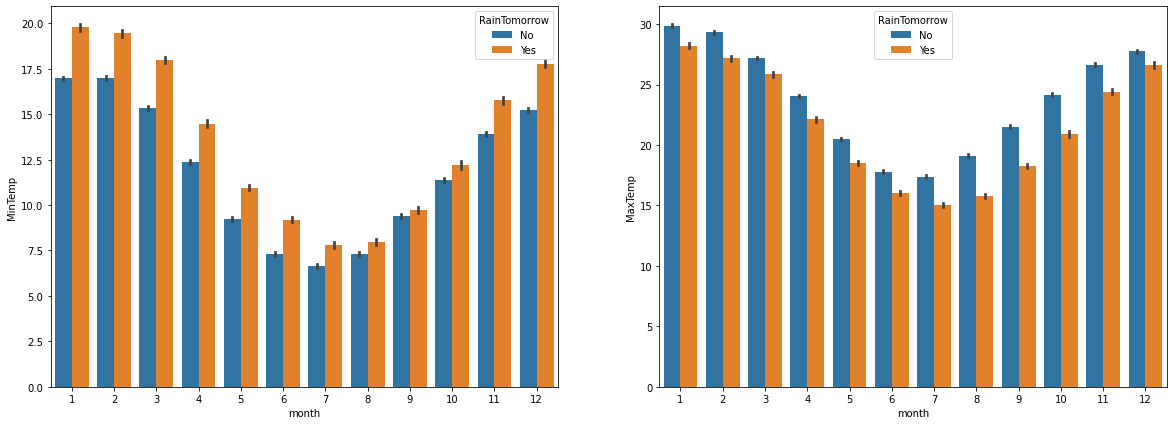

In [76]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(20,7))
sns.barplot(x=df_weather.month,y=df_weather.MinTemp,hue="RainTomorrow",data=df_weather,ax=ax[0])
sns.barplot(x=df_weather.month,y=df_weather.MaxTemp,hue="RainTomorrow",data=df_weather,ax=ax[1])
# The maximum number of days where it was found to be raining in January. 
# It decreases progressively and was found to be the lowest in July. 
# It increases towards the latter part of the year and the cycle continues again.

<AxesSubplot:xlabel='month', ylabel='MaxTemp'>

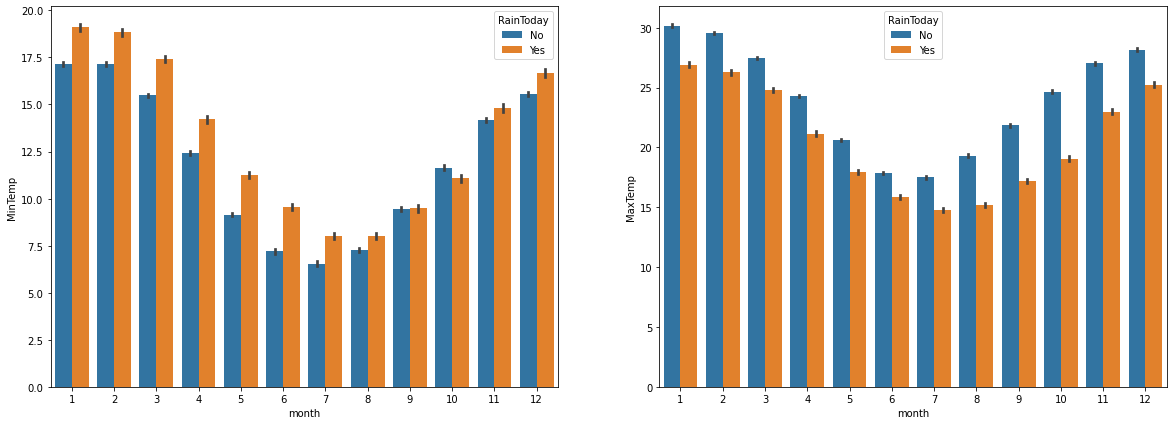

In [77]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(20,7))
sns.barplot(x=df_weather.month,y=df_weather.MinTemp,hue="RainToday",data=df_weather,ax=ax[0])
sns.barplot(x=df_weather.month,y=df_weather.MaxTemp,hue="RainToday",data=df_weather,ax=ax[1])
# The maximum number of days where it was found to be raining in January. 
# It decreases progressively and was found to be the lowest in July. 
# It increases towards the latter part of the year and the cycle continues again.

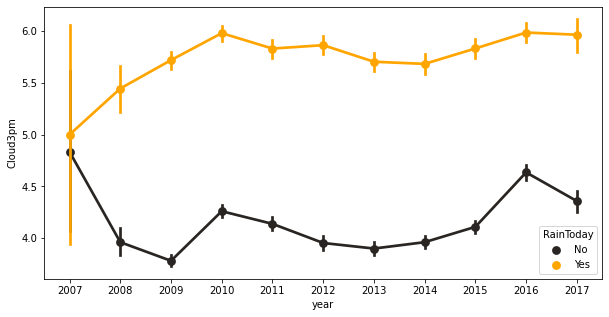

In [78]:
from plotly.offline import iplot
fig, ax =plt.subplots(nrows=1,ncols=1, figsize=(10,5))
sns.pointplot(x="year",y="Cloud3pm",data=df_weather,hue="RainToday",color='orange')
plt.show()
# When there is more cloud the chances of raining more for the each year on rain today

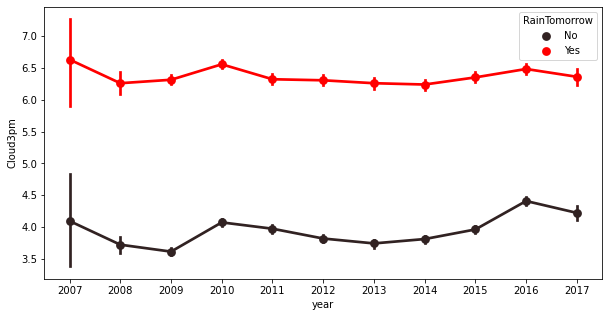

In [79]:
from plotly.offline import iplot
fig, ax =plt.subplots(nrows=1,ncols=1, figsize=(10,5))
sns.pointplot(x="year",y="Cloud3pm",data=df_weather,hue="RainTomorrow",color="red")
plt.show()
# When there is more cloud the chances of raining more for the each year on rain tomorrow

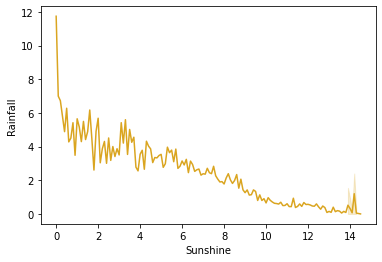

In [80]:
sns.lineplot(data=df_weather,x='Sunshine',y='Rainfall',color='goldenrod')
plt.show()
# rainfall and sunshine are inversely propotional of each other

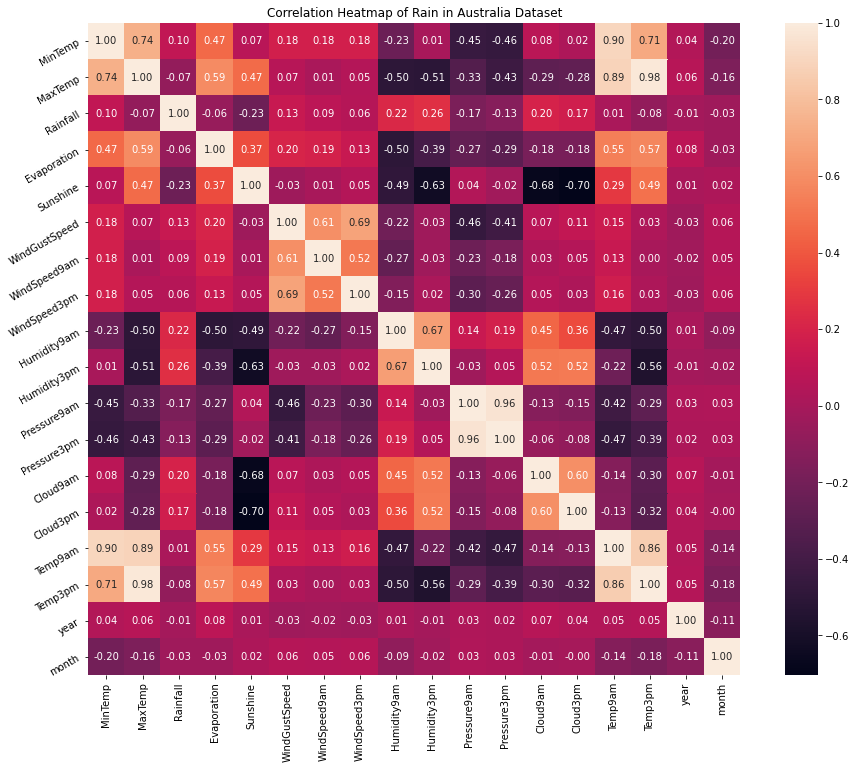

In [81]:
correlation=df_weather.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

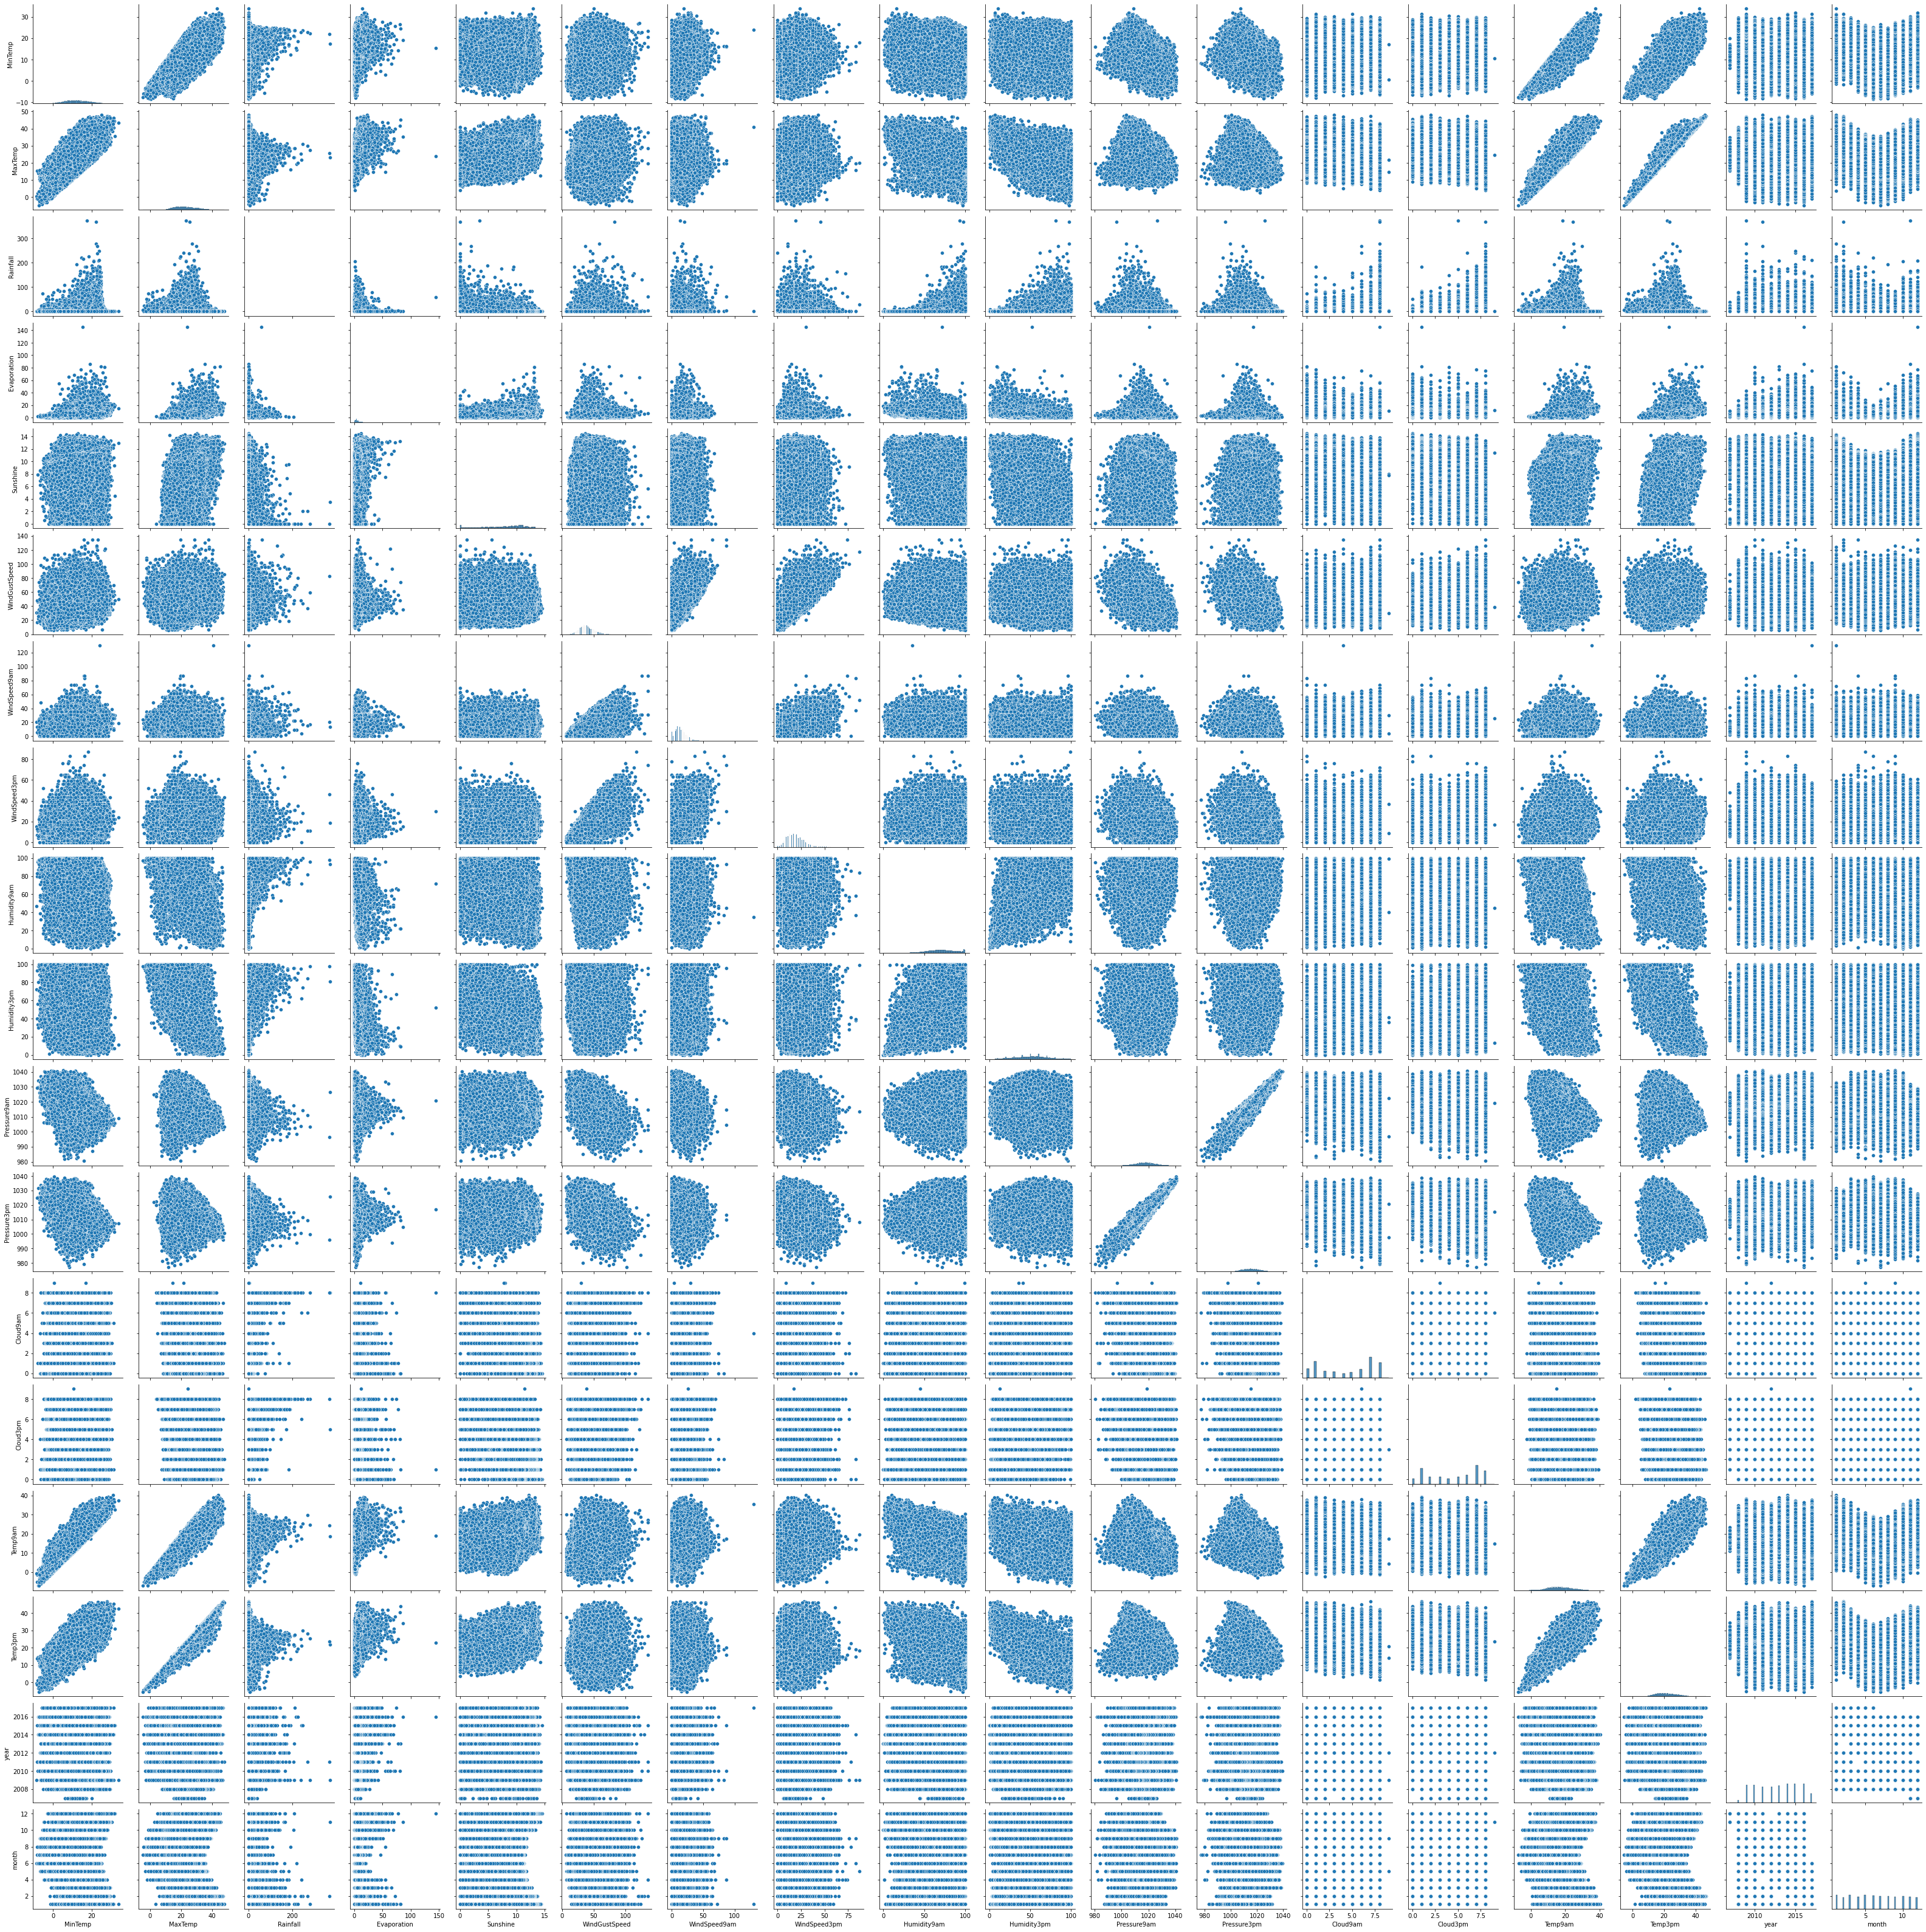

In [45]:
sns.pairplot(df_weather,kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

#### Handeling missing values

In [82]:
df_null = pd.DataFrame({'Total null values':df_weather.isnull().sum(),'Percentage':df_weather.isnull().sum()*100 / len(df_weather),'Datatype':df_weather.dtypes})

In [83]:
df_null.sort_values(by='Percentage',ascending=False)
# Null values counts and percentage of null values for each respective features

Total null values  Percentage Datatype
Sunshine                   69674   47.952154  float64
Evaporation                62629   43.103531  float64
Cloud3pm                   59197   40.741505  float64
Cloud9am                   55727   38.353327  float64
Pressure9am                14904   10.257469  float64
Pressure3pm                14867   10.232004  float64
WindDir9am                 10405    7.161095   object
WindGustDir                10165    6.995919   object
WindGustSpeed              10102    6.952560  float64
Humidity3pm                 4346    2.991074  float64
WindDir3pm                  4067    2.799056   object
Temp3pm                     3448    2.373038  float64
RainTomorrow                3133    2.156243   object
RainToday                   3127    2.152114   object
Rainfall                    3127    2.152114  float64
WindSpeed3pm                2901    1.996573  float64
Humidity9am                 2493    1.715772  float64
Temp9am                     1606    1.105307  float64
WindSpeed9am                1606    1.105307  float64
MinTemp                     1324    0.911224  float64
MaxTemp                     1100    0.757060  float64
year                           0    0.000000    int64
Location                       0    0.000000   object
month                          0    0.000000    int64

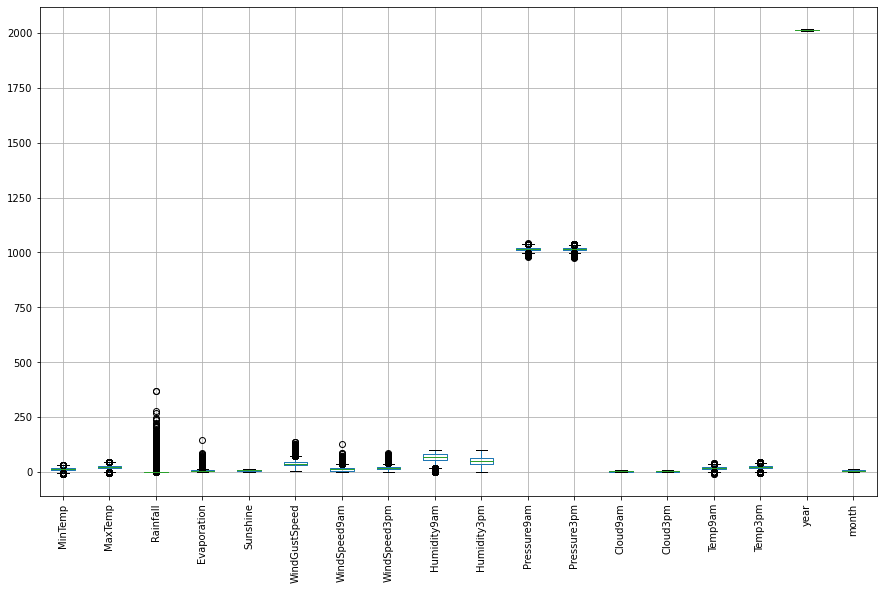

In [84]:
plt.figure(figsize=(15,9))
df_weather.boxplot()
plt.xticks(rotation=90)
plt.show()
# Outlier analysis for features using boxplot

##### Drop the missing values:
In this case, we drop the missing values from those variables. In case there are very few missing values you can drop those values.

##### Impute with mean value: 
For the numerical column, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn’t have extreme values .i.e. outliers.

##### Impute with median value:
For the numerical column, you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.

#### Impute with mode value:
For the categorical column, you can replace the missing values with mode values i.e the frequent ones.

Droping missing values rows which has very less amount of missing values

In [85]:
df_weather = df_weather.dropna(subset=['MaxTemp','MinTemp','WindSpeed9am','Temp9am','Humidity9am','WindSpeed3pm',
                                      'Rainfall','RainToday','RainTomorrow','Temp3pm','WindDir3pm','Humidity3pm',
                                       'WindGustSpeed','WindDir9am','Pressure9am','Pressure3pm','WindGustDir'],how='any')

In [86]:
df_weather.shape

(112925, 24)

In [87]:
df_weather.isnull().sum()*100/len(df_weather)

Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      36.434802
Sunshine         40.982068
WindGustDir       0.000000
WindGustSpeed     0.000000
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         33.039628
Cloud3pm         34.222714
Temp9am           0.000000
Temp3pm           0.000000
RainToday         0.000000
RainTomorrow      0.000000
year              0.000000
month             0.000000
dtype: float64

<AxesSubplot:xlabel='Cloud9am'>

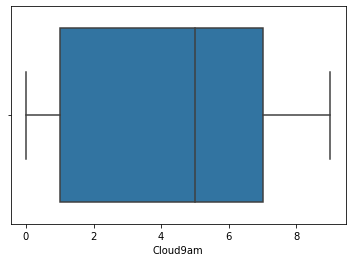

In [88]:
sns.boxplot(data=df_weather,x =df_weather['Cloud9am'])

In [89]:
df_weather['Cloud9am'].fillna(df_weather['Cloud9am'].mean(), inplace=True)
# filling null values with mean of cloud9am variable

<AxesSubplot:xlabel='Cloud3pm'>

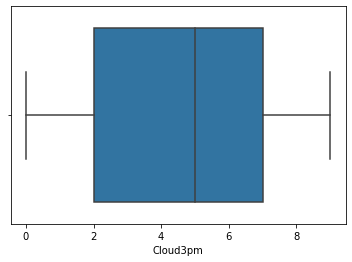

In [90]:
sns.boxplot(data=df_weather,x =df_weather['Cloud3pm'])

In [91]:
df_weather['Cloud3pm'].fillna(df_weather['Cloud3pm'].mean(), inplace=True)
# filling null values with mean of cloud3pm variable

<AxesSubplot:xlabel='Sunshine'>

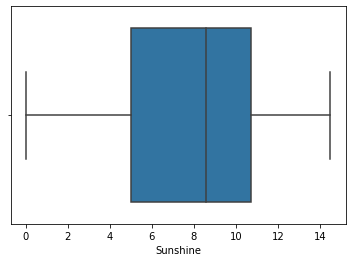

In [92]:
sns.boxplot(data=df_weather,x =df_weather['Sunshine'])

In [93]:
df_weather['Sunshine'].fillna(df_weather['Sunshine'].mean(), inplace=True)
# filling null values with mean of sunshine variable

<AxesSubplot:xlabel='Evaporation'>

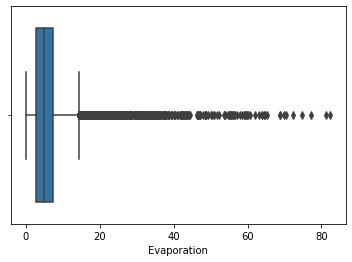

In [94]:
sns.boxplot(data=df_weather,x =df_weather['Evaporation'])

In [95]:
df_weather['Evaporation'].fillna(df_weather['Evaporation'].median(), inplace=True)
# filling null values with median of evaporation variable

In [96]:
df_weather.isnull().sum()*100/len(df_weather)

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
year             0.0
month            0.0
dtype: float64

In [97]:
df_weather.shape

(112925, 24)

<AxesSubplot:xlabel='Evaporation'>

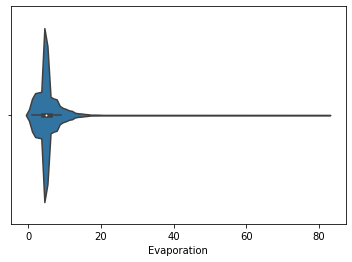

In [98]:
sns.violinplot(data=df_weather,x=df_weather['Evaporation'])

<AxesSubplot:xlabel='Sunshine'>

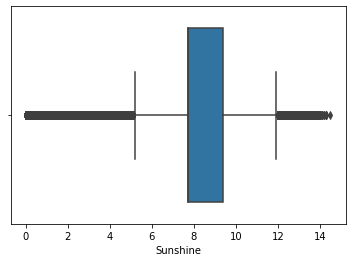

In [99]:
sns.boxplot(data=df_weather,x=df_weather['Sunshine'])

In [100]:
df_weather.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month'],
      dtype='object')

###  Dropping unnecessary columns

In [101]:
df_weather = df_weather.drop(columns=['Location','WindGustDir','WindDir9am','WindDir3pm','MinTemp','Pressure9am','Temp9am','RainToday'])
#as those columns have more number of unique values encoding them will lead to dimensionality curse so droping them 

In [102]:
df_weather = df_weather.drop(columns=['year','month'])

In [103]:
df_weather.head()

MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     22.9       0.6          4.8  7.727338           44.0          20.0   
1     25.1       0.0          4.8  7.727338           44.0           4.0   
2     25.7       0.0          4.8  7.727338           46.0          19.0   
3     28.0       0.0          4.8  7.727338           24.0          11.0   
4     32.3       1.0          4.8  7.727338           41.0           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  \
0          24.0         71.0         22.0       1007.1  8.000000  4.483111   
1          22.0         44.0         25.0       1007.8  4.405475  4.483111   
2          26.0         38.0         30.0       1008.7  4.405475  2.000000   
3           9.0         45.0         16.0       1012.8  4.405475  4.483111   
4          20.0         82.0         33.0       1006.0  7.000000  8.000000   

   Temp3pm RainTomorrow  
0     21.8           No  
1     24.3           No  
2     23.2           No  
3     26.5           No  
4     29.7           No

In [104]:
df_weather['RainTomorrow']=df_weather['RainTomorrow'].replace({'Yes':1,'No':0})
# replacing categotical variable into numerical variable to predict the target variable

In [105]:
df_weather

MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0          22.9       0.6          4.8  7.727338           44.0          20.0   
1          25.1       0.0          4.8  7.727338           44.0           4.0   
2          25.7       0.0          4.8  7.727338           46.0          19.0   
3          28.0       0.0          4.8  7.727338           24.0          11.0   
4          32.3       1.0          4.8  7.727338           41.0           7.0   
...         ...       ...          ...       ...            ...           ...   
145454     21.8       0.0          4.8  7.727338           31.0          15.0   
145455     23.4       0.0          4.8  7.727338           31.0          13.0   
145456     25.3       0.0          4.8  7.727338           22.0          13.0   
145457     26.9       0.0          4.8  7.727338           37.0           9.0   
145458     27.0       0.0          4.8  7.727338           28.0          13.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  \
0               24.0         71.0         22.0       1007.1  8.000000   
1               22.0         44.0         25.0       1007.8  4.405475   
2               26.0         38.0         30.0       1008.7  4.405475   
3                9.0         45.0         16.0       1012.8  4.405475   
4               20.0         82.0         33.0       1006.0  7.000000   
...              ...          ...          ...          ...       ...   
145454          13.0         59.0         27.0       1021.2  4.405475   
145455          11.0         51.0         24.0       1020.3  4.405475   
145456           9.0         56.0         21.0       1019.1  4.405475   
145457           9.0         53.0         24.0       1016.8  4.405475   
145458           7.0         51.0         24.0       1016.5  3.000000   

        Cloud3pm  Temp3pm  RainTomorrow  
0       4.483111     21.8             0  
1       4.483111     24.3             0  
2       2.000000     23.2             0  
3       4.483111     26.5             0  
4       8.000000     29.7             0  
...          ...      ...           ...  
145454  4.483111     20.9             0  
145455  4.483111     22.4             0  
145456  4.483111     24.5             0  
145457  4.483111     26.1             0  
145458  2.000000     26.0             0  

[112925 rows x 14 columns]

In [106]:
num_df = df_weather.select_dtypes(np.number)

In [107]:
for i in num_df.columns:
    q1=num_df[i].quantile(0.25)
    q3=num_df[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=num_df[i].quantile(0.99)
    lc=num_df[i].quantile(0.01)
    for ind1 in num_df[i].index:
        if num_df.loc[ind1,i]>ub:
            num_df.loc[ind1,i] = uc
        if num_df.loc[ind1,i]<lc:
            num_df.loc[ind1,i] = lc
            
# capping outliers with respective features or variables            

In [108]:
num_df.head()

MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     22.9       0.6          4.8  7.727338           44.0          20.0   
1     25.1       0.0          4.8  7.727338           44.0           4.0   
2     25.7       0.0          4.8  7.727338           46.0          19.0   
3     28.0       0.0          4.8  7.727338           24.0          11.0   
4     32.3       1.0          4.8  7.727338           41.0           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  \
0          24.0         71.0         22.0       1007.1  8.000000  4.483111   
1          22.0         44.0         25.0       1007.8  4.405475  4.483111   
2          26.0         38.0         30.0       1008.7  4.405475  2.000000   
3           9.0         45.0         16.0       1012.8  4.405475  4.483111   
4          20.0         82.0         33.0       1006.0  7.000000  8.000000   

   Temp3pm  RainTomorrow  
0     21.8           0.0  
1     24.3           0.0  
2     23.2           0.0  
3     26.5           0.0  
4     29.7           0.0

In [109]:
num_df['RainTomorrow'].unique()

array([0., 1.])

In [110]:
num_df.isnull().sum()

MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp3pm          0
RainTomorrow     0
dtype: int64

# statistical tests on Features

In [111]:
# statistical tests
from scipy.stats import ttest_ind,chi2_contingency

In [112]:
df_target=num_df.groupby('RainTomorrow')
df_target_0=df_target.get_group(0)
df_target_1=df_target.get_group(1)

In [113]:
sel_cols=[]
for i in num_df:
    if ttest_ind(df_target_0[i],df_target_1[i]).pvalue<0.05:
        sel_cols.append(i)
        
print(sel_cols)

['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainTomorrow']


In [114]:
for i in num_df[0:-1]:
    ct=pd.crosstab(num_df['RainTomorrow'],num_df[i])
    chi_value,p_value,dof,ec=chi2_contingency(ct)
    if p_value<0.05:
        sel_cols.append(i)
        
print(sel_cols)

['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainTomorrow', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainTomorrow']


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x=num_df.drop(['RainTomorrow'],axis=1)
y=num_df['RainTomorrow']

In [117]:
xtrain,xtest,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
# Splitting the data into train and test to build and train the model

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)
x
# scaling part done except target variable and raintoday variable

array([[-1.09816819e-01, -4.37812069e-01, -2.16613996e-01, ...,
         1.52798861e+00,  4.03237617e-16, -4.90762533e-02],
       [ 2.06668608e-01, -4.79062225e-01, -2.16613996e-01, ...,
         0.00000000e+00,  4.03237617e-16,  3.18890722e-01],
       [ 2.92982816e-01, -4.79062225e-01, -2.16613996e-01, ...,
         0.00000000e+00, -1.12734528e+00,  1.56985253e-01],
       ...,
       [ 2.35440011e-01, -4.79062225e-01, -2.16613996e-01, ...,
         0.00000000e+00,  4.03237617e-16,  3.48328080e-01],
       [ 4.65611231e-01, -4.79062225e-01, -2.16613996e-01, ...,
         0.00000000e+00,  4.03237617e-16,  5.83826945e-01],
       [ 4.79996932e-01, -4.79062225e-01, -2.16613996e-01, ...,
        -5.97450293e-01, -1.12734528e+00,  5.69108266e-01]])

In [142]:
num_df.head()

MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     22.9       0.6          4.8  7.727338           44.0          20.0   
1     25.1       0.0          4.8  7.727338           44.0           4.0   
2     25.7       0.0          4.8  7.727338           46.0          19.0   
3     28.0       0.0          4.8  7.727338           24.0          11.0   
4     32.3       1.0          4.8  7.727338           41.0           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  Cloud3pm  \
0          24.0         71.0         22.0       1007.1  8.000000  4.483111   
1          22.0         44.0         25.0       1007.8  4.405475  4.483111   
2          26.0         38.0         30.0       1008.7  4.405475  2.000000   
3           9.0         45.0         16.0       1012.8  4.405475  4.483111   
4          20.0         82.0         33.0       1006.0  7.000000  8.000000   

   Temp3pm  RainTomorrow  
0     21.8           0.0  
1     24.3           0.0  
2     23.2           0.0  
3     26.5           0.0  
4     29.7           0.0

In [140]:
df_null = pd.DataFrame(x,columns=num_df.columns[0:13])

In [143]:
df_null.head()

MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0 -0.109817 -0.437812    -0.216614 -0.012619       0.245206      0.591432   
1  0.206669 -0.479062    -0.216614 -0.012619       0.245206     -1.358304   
2  0.292983 -0.479062    -0.216614 -0.012619       0.397432      0.469573   
3  0.623854 -0.479062    -0.216614 -0.012619      -1.277054     -0.505295   
4  1.242439 -0.410312    -0.216614 -0.012619       0.016867     -0.992729   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure3pm  Cloud9am  \
0      0.540413     0.188928    -1.384285    -1.168043  1.527989   
1      0.302185    -1.249739    -1.239533    -1.065502  0.000000   
2      0.778641    -1.569443    -0.998278    -0.933663  0.000000   
3     -1.246297    -1.196455    -1.673791    -0.333061  0.000000   
4      0.063957     0.775052    -0.853526    -1.329180  1.102901   

       Cloud3pm   Temp3pm  
0  4.032376e-16 -0.049076  
1  4.032376e-16  0.318891  
2 -1.127345e+00  0.156985  
3  4.032376e-16  0.642702  
4  1.596686e+00  1.113699

In [77]:
# Basic model for classification problem id Logistic regression
from sklearn.linear_model import LogisticRegression

In [78]:
lr=LogisticRegression()

In [79]:
lr_model=lr.fit(xtrain,y_train)
y_pred=lr.predict(xtest)

In [80]:
y_pred
# ypredicted values or outcomed values

array([1., 0., 1., ..., 0., 0., 0.])

In [81]:
from sklearn.metrics import classification_report,f1_score,cohen_kappa_score

In [82]:
print(classification_report(y_test,y_pred))
#After building the model check accuracy score and f1 score for predicted model

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     17586
         1.0       0.72      0.50      0.59      4999

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585



In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [84]:
print(confusion_matrix(y_test,y_pred))

[[16609   977]
 [ 2478  2521]]


In [85]:
print(f1_score(y_test,y_pred))

0.5933859009062022


In [86]:
print('Train Accuracy Logistic regression is:',lr_model.score(xtrain,y_train))
print('Test Accuracy Logistic regression is:',lr_model.score(xtest,y_test))

Train Accuracy Logistic regression is: 0.848627407571397
Test Accuracy Logistic regression is: 0.8470223599734337


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import make_scorer

In [88]:
dt = DecisionTreeClassifier()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
GNB =GaussianNB()

In [89]:
dt.fit(xtrain,y_train)
pred_dt=dt.predict(xtest)
print('Train Accuracy DecisionTree is:',dt.score(xtrain,y_train))
print('Test Accuracy DecisionTree is:',dt.score(xtest,y_test))

Train Accuracy DecisionTree is: 1.0
Test Accuracy DecisionTree is: 0.7864954615895506


In [90]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(xtrain,y_train)
predicted = xgbc.predict(xtest)
print('Train Accuracy XGBoost is:',xgbc.score(xtrain,y_train)*100)
print ("The accuracy of XGBoost is : ",accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for XGBoost is :",f1_score(y_test, predicted,)*100, "%")

[18:51:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy XGBoost is: 88.52667699800753
The accuracy of XGBoost is :  85.67190613238876 %

F1 score for XGBoost is : 62.52894858730894 %


In [93]:
print(cohen_kappa_score(y_test,predicted))

0.5394224502801319


In [94]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators': [5,10,20,50,100,150,200],
        # 'max_features':['auto','sqrt','log2'],
        #'criterion':['gini','entropy'],
        'max_depth':[5,10,15,20,25,30,35,40]}

In [95]:
rf_mod1=RandomForestClassifier()
hyp_mod=GridSearchCV(rf_mod1,param_grid=params,scoring='f1')

In [96]:
tun_mod=hyp_mod.fit(xtrain,y_train)

In [97]:
tun_mod.best_params_

{'max_depth': 25, 'n_estimators': 150}

In [98]:
final_mod=RandomForestClassifier(**tun_mod.best_params_)

In [99]:
final_mod.fit(xtrain,y_train)

RandomForestClassifier(max_depth=25, n_estimators=150)

In [100]:
ypred1=final_mod.predict(xtest)
ypred1_train=final_mod.predict(xtrain)

In [101]:
confusion_matrix(y_test,ypred1)

array([[16759,   827],
       [ 2401,  2598]], dtype=int64)

In [102]:
print('Training accuracy',final_mod.score(xtrain,y_train))

Training accuracy 0.9980075271197698


In [103]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     17586
         1.0       0.76      0.52      0.62      4999

    accuracy                           0.86     22585
   macro avg       0.82      0.74      0.76     22585
weighted avg       0.85      0.86      0.85     22585



In [125]:
feature_names=list(xtrain.columns)

In [129]:
feature_imp=pd.Series(final_mod.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

Humidity3pm      0.226764
Pressure3pm      0.105178
WindGustSpeed    0.081356
Humidity9am      0.080040
Sunshine         0.078948
Temp3pm          0.073562
MaxTemp          0.071676
Rainfall         0.058562
WindSpeed3pm     0.051244
WindSpeed9am     0.049110
Cloud3pm         0.049090
Evaporation      0.041820
Cloud9am         0.032651
dtype: float64

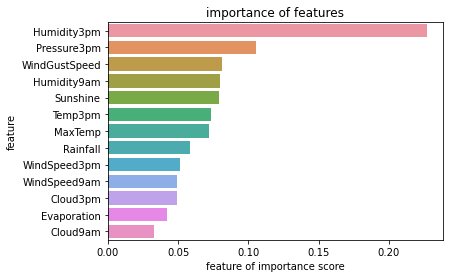

In [130]:
sns.barplot(feature_imp,feature_imp.index)
plt.xlabel('feature of importance score')
plt.ylabel('feature')
plt.title('importance of features')
plt.show()

In [116]:
print(cohen_kappa_score(y_test,ypred1))

0.5553127256176301


In [93]:
model = GaussianNB()
model.fit(xtrain, y_train)
  
predicted = model.predict(xtest)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for Gaussian Naive Bayes is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  78.93292007969892 %

F1 score for Gaussian Naive Bayes is : 59.067446662078446 %


In [115]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(xtrain, y_train)  
predicted = model.predict(xtest)
print("The accuracy of Random Forest is : ", model.score(xtrain, y_train.round())*100, "%")
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

<IPython.core.display.Javascript object>

The accuracy of Random Forest is :  91.45482137018271 %
The accuracy of Random Forest is :  85.35311047155191 %


In [116]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model.fit(xtrain,y_train)  
predicted = model.predict(xtest)
print("The accuracy of Random Forest is : ", model.score(xtrain, y_train.round())*100, "%")
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  99.99557228248838 %
The accuracy of Random Forest is :  85.57892406464468 %


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

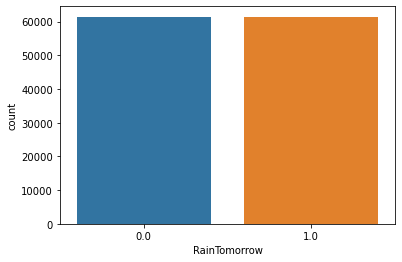

In [89]:
from imblearn.over_sampling import SMOTE
x=num_df[['MaxTemp','Rainfall','Evaporation',
          'Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
          'Humidity9am','Humidity3pm','Pressure3pm',
          'Cloud9am','Cloud3pm',
          'Temp3pm']]
y=num_df['RainTomorrow']
xtrain,xtest,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
sm = SMOTE(random_state=42)
xtrain,y_train=sm.fit_resample(xtrain,y_train)
sns.countplot(y_train)

In [90]:
# after SMOTE sampling checking Accuracy for all the models

In [91]:
lr=LogisticRegression()
lr_model=lr.fit(xtrain,y_train)
y_pred=lr.predict(xtest)
y_pred
# ypredicted values or outcomed values

array([0., 0., 1., ..., 0., 0., 0.])

In [92]:
print(classification_report(y_test,y_pred))
#After building the model check accuracy score and f1 score for predicted model

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85     26468
         1.0       0.51      0.78      0.62      7410

    accuracy                           0.79     33878
   macro avg       0.72      0.78      0.73     33878
weighted avg       0.84      0.79      0.80     33878



In [93]:
print(confusion_matrix(y_test,y_pred))

[[20905  5563]
 [ 1638  5772]]


In [94]:
print('Train Accuracy Logistic regression is:',lr_model.score(xtrain,y_train))
print('Test Accuracy Logistic regression is:',lr_model.score(xtest,y_test))

Train Accuracy Logistic regression is: 0.7833018652950943
Test Accuracy Logistic regression is: 0.7874431784638999


In [97]:
dt.fit(xtrain,y_train)
pred_dt=dt.predict(xtest)
print('Train Accuracy DecisionTree is:',dt.score(xtrain,y_train))
print('Test Accuracy DecisionTree is:',dt.score(xtest,y_test))

Train Accuracy DecisionTree is: 1.0
Test Accuracy DecisionTree is: 0.7790011216718814


In [98]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(xtrain,y_train)
predicted = xgbc.predict(xtest)
print('Train Accuracy XGBoost is:',xgbc.score(xtrain,y_train)*100)
print ("The accuracy of XGBoost is : ",accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for XGBoost is :",f1_score(y_test, predicted,)*100, "%")

[16:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy XGBoost is: 92.02854910641622
The accuracy of XGBoost is :  85.65735875789599 %

F1 score for XGBoost is : 63.3199969804484 %


In [99]:
model = GaussianNB()
model.fit(xtrain, y_train)  
predicted = model.predict(xtest)  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for Gaussian Naive Bayes is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  74.44949524765335 %

F1 score for Gaussian Naive Bayes is : 56.965297802525605 %


In [100]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(xtrain, y_train)  
predicted = model.predict(xtest)
print("The accuracy of Random Forest Regressor is : ", model.score(xtrain, y_train.round())*100, "%")
print("The accuracy of Random Forest Regressor is : ", accuracy_score(y_test, predicted.round())*100, "%")

<IPython.core.display.Javascript object>

The accuracy of Random Forest Regressor is :  95.91217259676422 %
The accuracy of Random Forest Regressor is :  84.36448432611134 %


In [101]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model.fit(xtrain, y_train)  
predicted = model.predict(xtest)
print("The accuracy of Random Forest Classifier is : ", model.score(xtrain, y_train.round())*100, "%")
print("The accuracy of Random Forest Classifier is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest Classifier is :  100.0 %
The accuracy of Random Forest Classifier is :  84.94893441171261 %


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.79      0.85     26468
         1.0       0.51      0.78      0.62      7410

    accuracy                           0.79     33878
   macro avg       0.72      0.78      0.73     33878
weighted avg       0.84      0.79      0.80     33878



In [103]:
from sklearn.model_selection import GridSearchCV

params={'n_estimators': [5,10,20,50,100,150,200],
        # 'max_features':['auto','sqrt','log2'],
        #'criterion':['gini','entropy'],
        'max_depth':[5,10,15,20,25,30,35,40]}

In [104]:
rf_mod1=RandomForestClassifier()
hyp_mod=GridSearchCV(rf_mod1,param_grid=params,scoring='f1')

In [105]:
tun_mod=hyp_mod.fit(xtrain,y_train)

In [106]:
tun_mod.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [107]:
final_mod=RandomForestClassifier(**tun_mod.best_params_)

In [108]:
final_mod.fit(xtrain,y_train)

RandomForestClassifier(max_depth=30, n_estimators=200)

In [109]:
ypred1=final_mod.predict(xtest)
ypred1_train=final_mod.predict(xtrain)

In [112]:
print('Training accuracy',final_mod.score(xtrain,y_train))

Training accuracy 1.0


In [111]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     26468
         1.0       0.67      0.64      0.65      7410

    accuracy                           0.85     33878
   macro avg       0.78      0.77      0.78     33878
weighted avg       0.85      0.85      0.85     33878

